In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Libraries loaded!")

✅ Libraries loaded!


In [2]:
import os
os.listdir('/home/jovyan/work/data/raw/')

['.gitkeep',
 '.ipynb_checkpoints',
 'BTCUSDT_1h.csv',
 'BTCUSDT_1m.csv',
 'ETHUSDT_1h.csv',
 'ETHUSDT_1m.csv']

In [3]:
# Load BTC data
btc = pd.read_csv('/home/jovyan/work/data/raw/BTCUSDT_1m.csv')

# Show first 5 rows
btc.head()

,timestamp,open,high,low,close,volume
0,2026-01-24 20:17:00,89391.58,89391.58,89391.57,89391.58,0.37558
1,2026-01-24 20:18:00,89391.57,89391.58,89373.53,89373.53,0.86428
2,2026-01-24 20:19:00,89373.54,89373.54,89373.53,89373.53,0.52194
3,2026-01-24 20:20:00,89373.54,89373.54,89373.53,89373.54,0.52714
4,2026-01-24 20:21:00,89373.54,89373.54,89373.53,89373.54,0.22039


In [4]:
# Load BTC data
btc = pd.read_csv('/home/jovyan/work/data/raw/ETHUSDT_1m.csv')

# Show first 5 rows
btc.head()

,timestamp,open,high,low,close,volume
0,2026-01-24 20:18:00,2958.74,2958.75,2958.19,2958.19,29.4640
1,2026-01-24 20:19:00,2958.20,2958.20,2957.87,2957.87,4.0075
2,2026-01-24 20:20:00,2957.87,2957.88,2957.87,2957.87,3.1375
3,2026-01-24 20:21:00,2957.87,2957.88,2957.87,2957.88,37.4740
4,2026-01-24 20:22:00,2957.87,2958.38,2957.87,2958.37,29.5258


In [5]:
btc.shape

(10080, 6)

In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10080 non-null  object 
 1   open       10080 non-null  float64
 2   high       10080 non-null  float64
 3   low        10080 non-null  float64
 4   close      10080 non-null  float64
 5   volume     10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


In [7]:
btc.describe()

,open,high,low,close,volume
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000
mean,2866.626654,2868.102304,2865.114333,2866.567889,394.541365
std,134.597955,134.003238,135.269591,134.685024,959.342867
min,2250.500000,2339.090000,2250.000000,2250.500000,0.859200
25%,2758.780000,2760.917500,2757.230000,2758.690000,74.841850
50%,2916.125000,2917.445000,2914.735000,2916.125000,166.714500
75%,2954.370000,2954.855000,2953.965000,2954.370000,371.118475
max,3043.490000,3045.780000,3040.430000,3043.500000,33035.743200


In [8]:
# Load BTC data
btc = pd.read_csv('/home/jovyan/work/data/raw/BTCUSDT_1h.csv')

# Show first 5 rows
btc.head()

,timestamp,open,high,low,close,volume
0,2025-12-21 05:00:00,88065.83,88150.01,88054.05,88138.95,67.73322
1,2025-12-21 06:00:00,88138.95,88201.59,88068.36,88090.72,107.24070
2,2025-12-21 07:00:00,88090.73,88174.79,88054.61,88174.79,100.25965
3,2025-12-21 08:00:00,88174.79,88767.20,88141.87,88537.87,426.66802
4,2025-12-21 09:00:00,88537.88,89081.77,88500.30,88892.82,535.95501


In [9]:
btc.describe()

,open,high,low,close,volume
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,90006.605930,90229.618260,89761.95010,89996.171750,609.580629
std,3074.324561,3071.590196,3122.63843,3098.540611,704.551403
min,77750.010000,77948.510000,75719.90000,77628.440000,46.433460
25%,87948.927500,88149.592500,87765.49250,87946.977500,249.632502
50%,89578.570000,89830.950000,89357.36000,89578.565000,403.618950
75%,91471.220000,91690.530000,91239.22750,91471.220000,713.698797
max,97655.270000,97924.490000,97390.00000,97655.280000,8241.956400


In [10]:
# How many times bigger is max volume vs mean?
btc['volume'].max() / btc['volume'].mean()

13.520699317902578

In [11]:
# Calculate how many standard deviations the max is from the mean
mean_vol = btc['volume'].mean()
std_vol = btc['volume'].std()
max_vol = btc['volume'].max()

# This is called a Z-score
z_score = (max_vol - mean_vol) / std_vol

print(f"Mean volume: {mean_vol:.2f}")
print(f"Std volume: {std_vol:.2f}")
print(f"Max volume: {max_vol:.2f}")
print(f"Z-score of max: {z_score:.2f}")

Mean volume: 609.58
Std volume: 704.55
Max volume: 8241.96
Z-score of max: 10.83


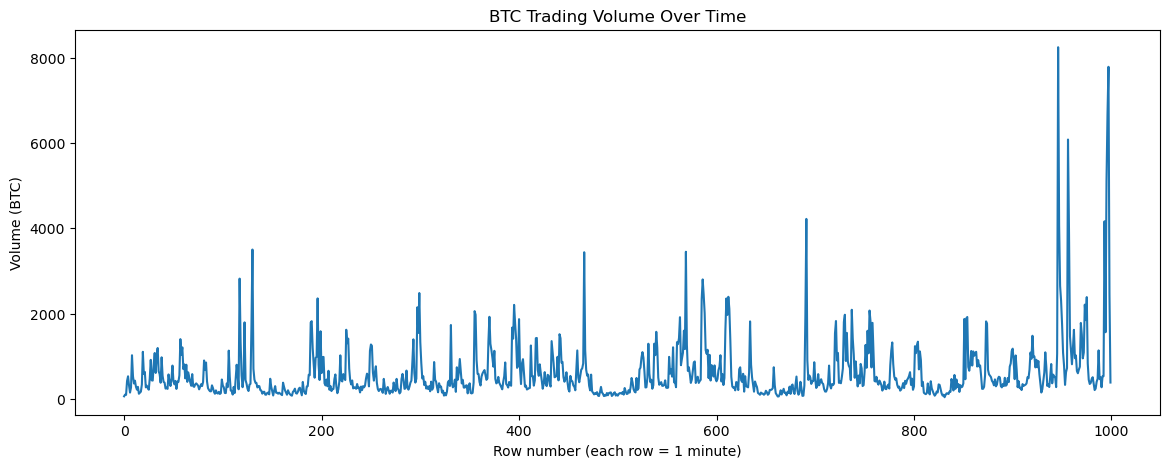

In [12]:
# Plot the volume over time
plt.figure(figsize=(14, 5))
plt.plot(btc['volume'])
plt.title('BTC Trading Volume Over Time')
plt.xlabel('Row number (each row = 1 minute)')
plt.ylabel('Volume (BTC)')
plt.show()

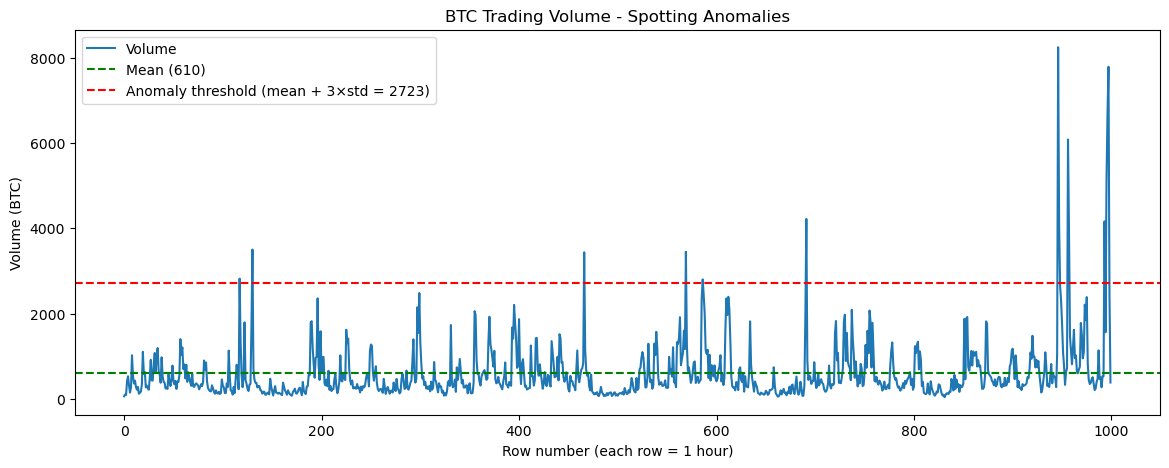

In [13]:
# Plot volume with threshold lines
plt.figure(figsize=(14, 5))
plt.plot(btc['volume'], label='Volume')

# Add horizontal lines for mean and anomaly threshold
mean_vol = btc['volume'].mean()
std_vol = btc['volume'].std()

plt.axhline(y=mean_vol, color='green', linestyle='--', label=f'Mean ({mean_vol:.0f})')
plt.axhline(y=mean_vol + 3*std_vol, color='red', linestyle='--', label=f'Anomaly threshold (mean + 3×std = {mean_vol + 3*std_vol:.0f})')

plt.title('BTC Trading Volume - Spotting Anomalies')
plt.xlabel('Row number (each row = 1 hour)')
plt.ylabel('Volume (BTC)')
plt.legend()
plt.show()

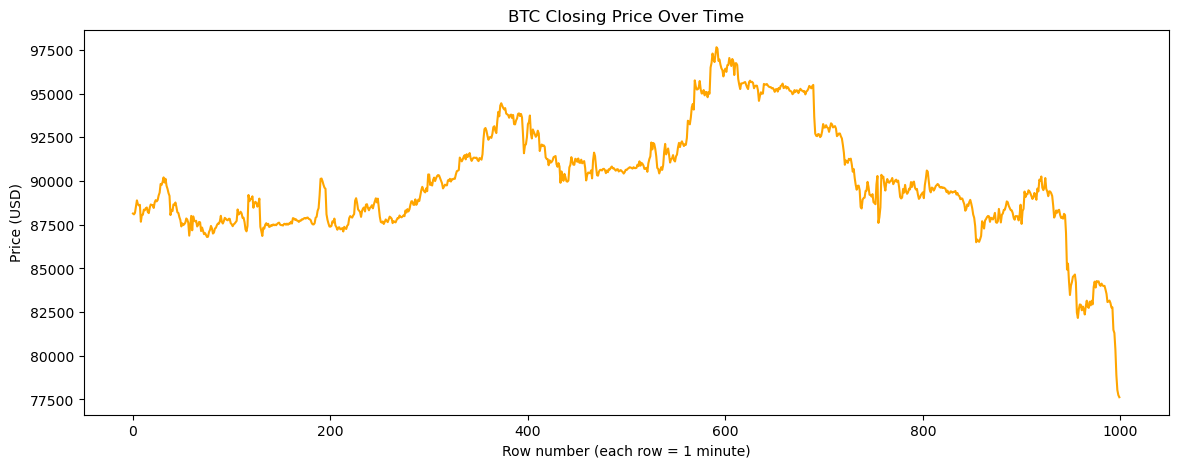

In [14]:
# Plot closing price over time
plt.figure(figsize=(14, 5))
plt.plot(btc['close'], color='orange')
plt.title('BTC Closing Price Over Time')
plt.xlabel('Row number (each row = 1 minute)')
plt.ylabel('Price (USD)')
plt.show()

In [15]:
# Calculate percentage return (price change from previous hour)
btc['return'] = btc['close'].pct_change() * 100

# Show last 5 rows to see the new column
btc.tail()

,timestamp,open,high,low,close,volume,return
995,2026-01-31 16:00:00,81302.16,82200.00,80098.01,80365.04,5113.56418,-1.152626
996,2026-01-31 17:00:00,80365.05,80550.74,78159.90,78893.92,6669.26832,-1.830547
997,2026-01-31 18:00:00,78893.92,79143.64,75719.90,78038.38,7783.32311,-1.084418
998,2026-01-31 19:00:00,78038.39,78576.30,77194.00,77750.01,2463.45994,-0.369523
999,2026-01-31 20:00:00,77750.01,77948.51,77628.43,77628.44,390.20265,-0.156360


In [16]:
btc['return'].describe()

count    999.000000
mean      -0.011952
std        0.388972
min       -2.974525
25%       -0.163881
50%       -0.006119
75%        0.155530
max        2.113489
Name: return, dtype: float64

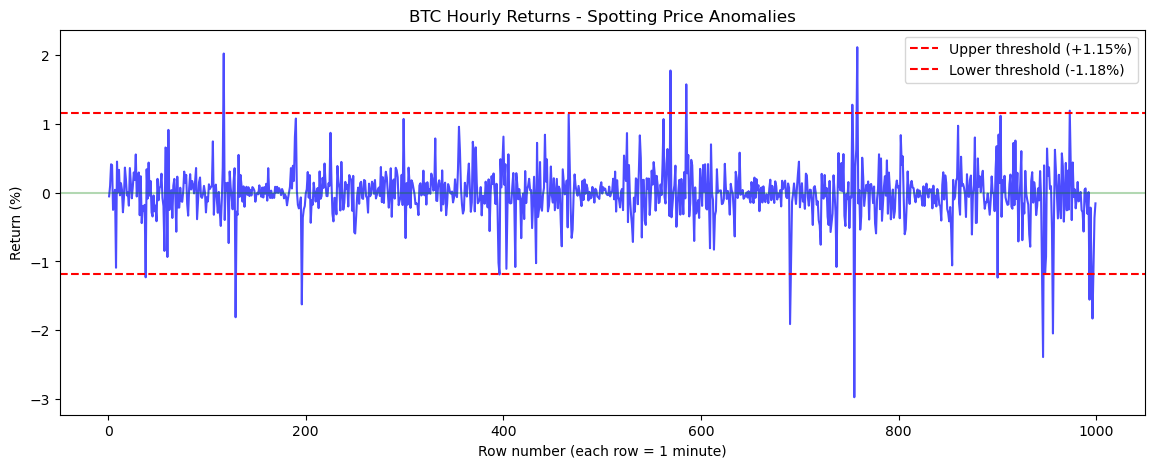

In [17]:
# Plot returns with anomaly thresholds
plt.figure(figsize=(14, 5))
plt.plot(btc['return'], color='blue', alpha=0.7)

mean_ret = btc['return'].mean()
std_ret = btc['return'].std()

plt.axhline(y=mean_ret + 3*std_ret, color='red', linestyle='--', label=f'Upper threshold (+{mean_ret + 3*std_ret:.2f}%)')
plt.axhline(y=mean_ret - 3*std_ret, color='red', linestyle='--', label=f'Lower threshold ({mean_ret - 3*std_ret:.2f}%)')
plt.axhline(y=0, color='green', linestyle='-', alpha=0.3)

plt.title('BTC Hourly Returns - Spotting Price Anomalies')
plt.xlabel('Row number (each row = 1 minute)')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

In [18]:
# Count anomalies using Z-score method
threshold = 3

btc['z_score_return'] = (btc['return'] - btc['return'].mean()) / btc['return'].std()

anomalies = btc[abs(btc['z_score_return']) > threshold]

print(f"Total data points: {len(btc)}")
print(f"Anomalies found: {len(anomalies)}")
print(f"Percentage: {len(anomalies)/len(btc)*100:.2f}%")

Total data points: 1000
Anomalies found: 19
Percentage: 1.90%


In [19]:
# Show the actual anomalies we found
anomalies = btc[abs(btc['z_score_return']) > 3][['timestamp', 'close', 'return', 'z_score_return']]
print(f"Found {len(anomalies)} anomalies:\n")
print(anomalies.to_string())

Found 19 anomalies:

               timestamp     close    return  z_score_return
38   2025-12-22 19:00:00  88052.43 -1.231194       -3.134520
117  2025-12-26 02:00:00  89199.99  2.021828        5.228599
129  2025-12-26 14:00:00  87380.43 -1.811887       -4.627408
196  2025-12-29 09:00:00  88100.05 -1.624754       -4.146314
396  2026-01-06 17:00:00  91589.24 -1.190045       -3.028730
569  2026-01-13 22:00:00  95757.21  1.774927        4.593848
585  2026-01-14 14:00:00  96493.15  1.573672        4.076445
690  2026-01-18 23:00:00  93673.14 -1.911515       -4.883540
753  2026-01-21 14:00:00  89805.43  1.277497        3.315014
755  2026-01-21 16:00:00  87602.40 -2.974525       -7.616408
758  2026-01-21 19:00:00  90355.56  2.113489        5.464248
900  2026-01-27 17:00:00  87546.58 -1.235156       -3.144705
945  2026-01-29 14:00:00  87014.40 -1.179382       -3.001318
946  2026-01-29 15:00:00  84934.02 -2.390846       -6.115841
948  2026-01-29 17:00:00  84261.66 -1.182526       -3.009400
956

In [20]:
anomalies.describe()

,close,return,z_score_return
count,19.000000,19.000000,19.000000
mean,87817.828947,-0.642828,-1.621904
std,4622.947588,1.678852,4.316120
min,78893.920000,-2.974525,-7.616408
25%,84597.840000,-1.821217,-4.651396
50%,87602.400000,-1.231194,-3.134520
75%,90080.495000,1.234276,3.203900
max,96493.150000,2.113489,5.464248


In [21]:
# Show the actual anomalies we found
anomalies = btc[abs(btc['z_score_return']) > 3][['timestamp', 'close','volume', 'return', 'z_score_return']]
print(f"Found {len(anomalies)} anomalies:\n")
print(anomalies.to_string())

Found 19 anomalies:

               timestamp     close      volume    return  z_score_return
38   2025-12-22 19:00:00  88052.43   980.77862 -1.231194       -3.134520
117  2025-12-26 02:00:00  89199.99  2823.54617  2.021828        5.228599
129  2025-12-26 14:00:00  87380.43  1728.76389 -1.811887       -4.627408
196  2025-12-29 09:00:00  88100.05  2360.59949 -1.624754       -4.146314
396  2026-01-06 17:00:00  91589.24  1784.74974 -1.190045       -3.028730
569  2026-01-13 22:00:00  95757.21  3452.31954  1.774927        4.593848
585  2026-01-14 14:00:00  96493.15  2348.26402  1.573672        4.076445
690  2026-01-18 23:00:00  93673.14  1930.81880 -1.911515       -4.883540
753  2026-01-21 14:00:00  89805.43  1602.75733  1.277497        3.315014
755  2026-01-21 16:00:00  87602.40  2075.92566 -2.974525       -7.616408
758  2026-01-21 19:00:00  90355.56  1787.81485  2.113489        5.464248
900  2026-01-27 17:00:00  87546.58  1183.80567 -1.235156       -3.144705
945  2026-01-29 14:00:00  8701

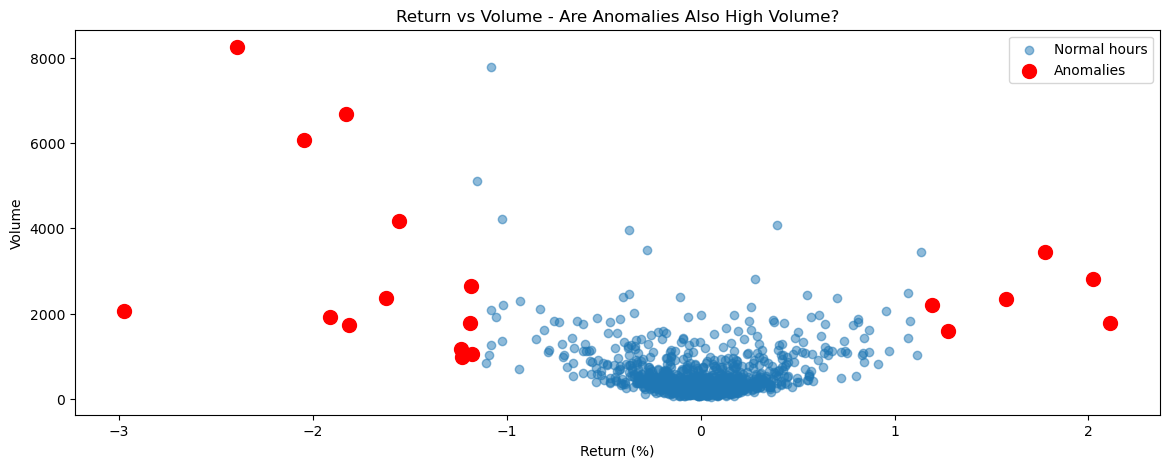

In [22]:
# Do anomalies in price also have anomalies in volume?
plt.figure(figsize=(14, 5))

plt.scatter(btc['return'], btc['volume'], alpha=0.5, label='Normal hours')
plt.scatter(anomalies['return'], anomalies['volume'], color='red', s=100, label='Anomalies')

plt.xlabel('Return (%)')
plt.ylabel('Volume')
plt.title('Return vs Volume - Are Anomalies Also High Volume?')
plt.legend()
plt.show()